In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

/Users/wileymorgan/.virtualenvs/afit/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                 header=None,sep="\s+")
df.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

In [3]:
X = df[["RM"]].values
y = df[["MEDV"]].values

In [4]:
slr = LinearRegression()
slr.fit(X,y)
print("Slope: %.3f"%slr.coef_[0])
print("Intecept: %.3f"%slr.intercept_)

Slope: 9.102
Intecept: -34.671


/Users/wileymorgan/.virtualenvs/afit/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


# Validating the model 

In [5]:
X = df.iloc[:,:-1].values
y = df["MEDV"].values
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=0)
slr = LinearRegression()
slr.fit(X,y)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [6]:
import analyze

HHHH
('label', None)
('x', (354,))
('y', (354,))
HHHH
('label', None)
('x', (354,))
('y', (354,))
HHHH
('label', None)
('x', (354,))
('y', (354,))
('H_diags', (354,))
('e', (354,))
('temp', (354,))
Hererere
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
HHHH
('label', 'Cooks Distance')
('x', (354,))
('y', (354,))
HHHH
('label', 'Influence')
('x', (354,))
('y', (354,))


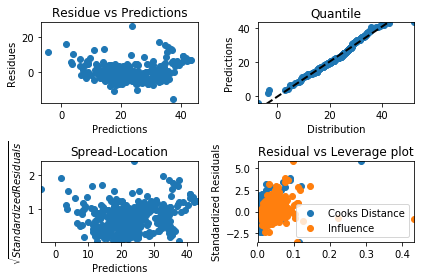

Prediction error for mean squared error metric: 20.20 


In [7]:
an = analyze.analysis(X_train,y_train,slr)
an.Validate()